<h1> Panorama Stitching Algorithm

<h2> Input Images:

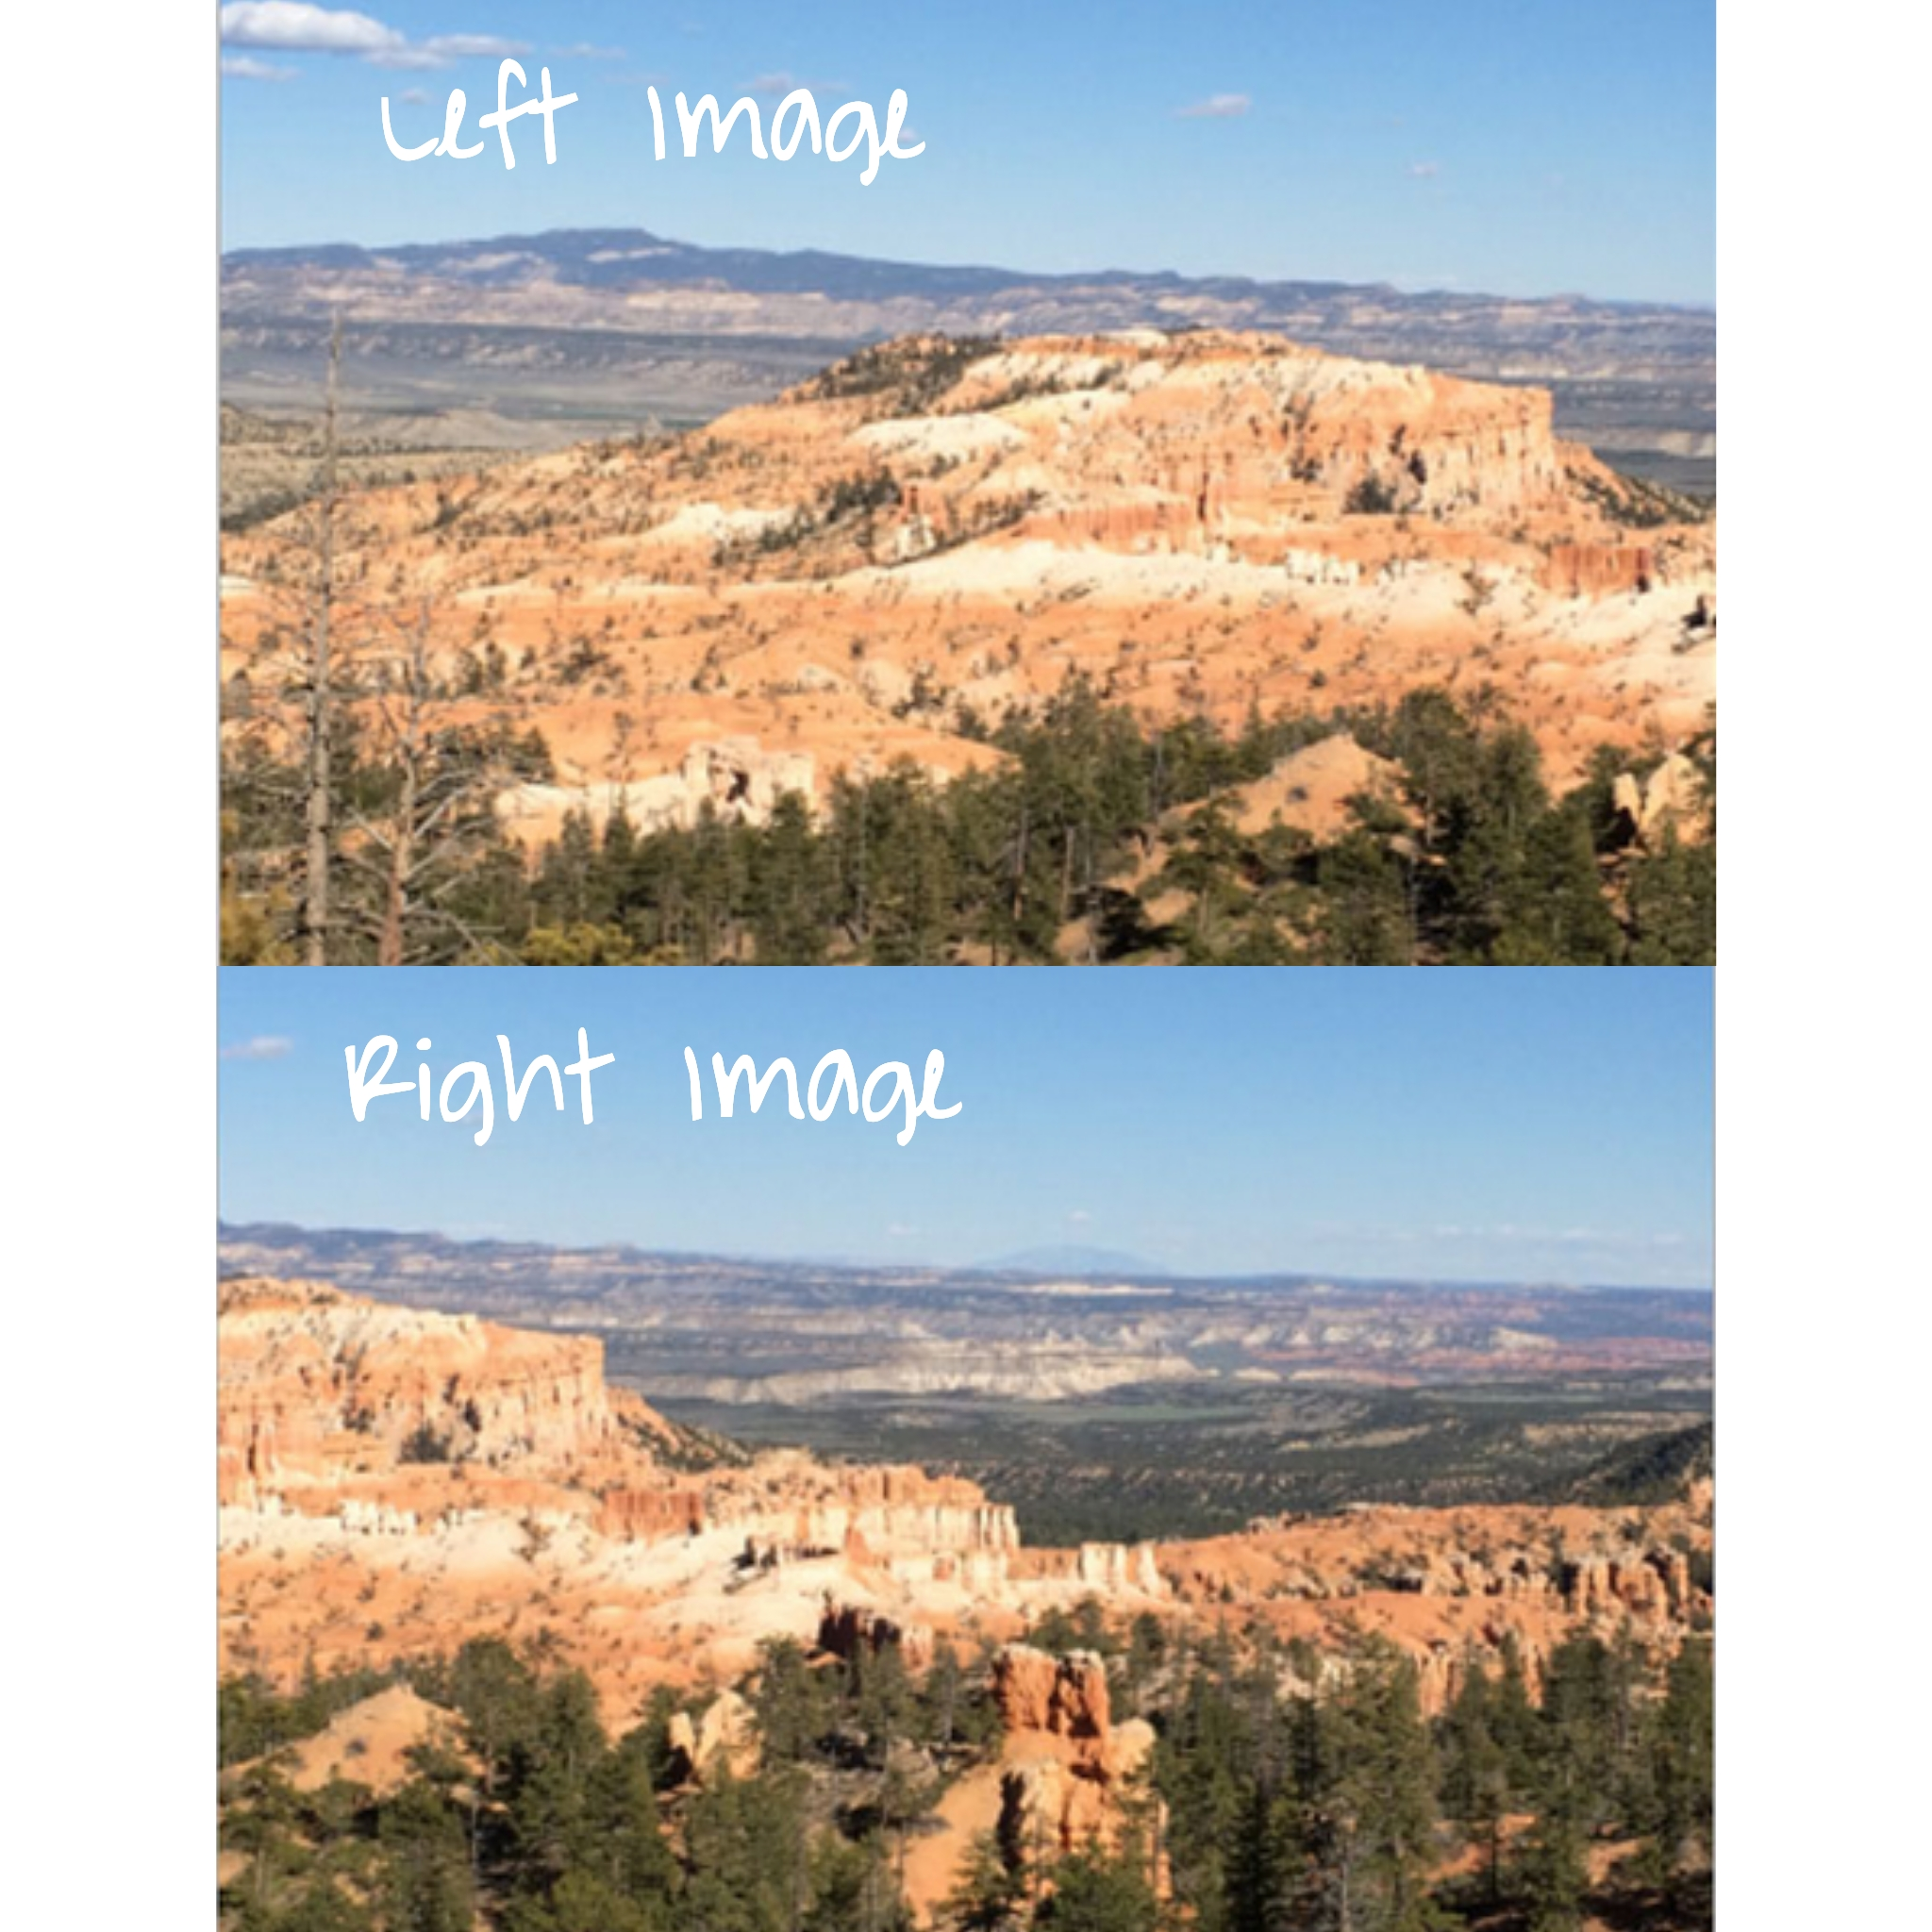

In [1]:
from IPython.display import Image
Image("input.jpg")

In [15]:
import numpy as np
import math
import sys
import os
import cv2
from PIL import Image
import imutils
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import pylab
from pylab import *
%matplotlib inline

In [2]:
def detectAndDescribe(image):
    # convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    detector = cv2.FeatureDetector_create("SIFT")
    kps = detector.detect(gray)
    # extract features from the image
    extractor = cv2.DescriptorExtractor_create("SIFT")
    (kps, features) = extractor.compute(gray, kps)
    #keypoints to numpy
    kps = np.float32([kp.pt for kp in kps])
    return (kps, features)

In [10]:
def matching(kps1, kps2, features1, features2,ratio, thresh):
    # compute the raw matches and initialize the list of actual matches
    matcher = cv2.DescriptorMatcher_create("BruteForce")
    rawMatches = matcher.knnMatch(features1, features2, 2)
    matches = []
    # loop over the raw matches
    for m in rawMatches:
        # ensure the distance is within a certain ratio of each
        # other (i.e. Lowe's ratio test)
        if len(m) == 2 and m[0].distance < m[1].distance * ratio:
            matches.append((m[0].trainIdx, m[0].queryIdx))
    # construct the two sets of points
    pts1 = np.float32([kps1[i] for (_, i) in matches])
    pts2 = np.float32([kps2[i] for (i, _) in matches])
    # compute the homography between the two sets of points
    (H, status) = cv2.findHomography(pts1, pts2, cv2.RANSAC,thresh)
    return (matches, H, status)

In [12]:
def stitch(image1,image2,ratio, thres):
    # description
    (k1, features1) = detectAndDescribe(image1)
    (k2, features2) = detectAndDescribe(image2)
    # matching
    match = matching(k1, k2,features1, features2, ratio, thres)
    # warp
    (matches, H, status) = match
    result = cv2.warpPerspective(image1, H,(image1.shape[1] + image2.shape[1], image1.shape[0]))
    result[0:image2.shape[0], 0:image2.shape[1]] = image2
    # return the stitched image
    return result

In [20]:
image1 = cv2.imread("image1.png")
image2 = cv2.imread("image2.png")
image1 = imutils.resize(image1, width=400)
image2 = imutils.resize(image2, width=400)
result = stitch(image1,image2,0.75,4.0)
cv2.imwrite('Output.jpg', np.uint8(result))

True

<h2>  Output:

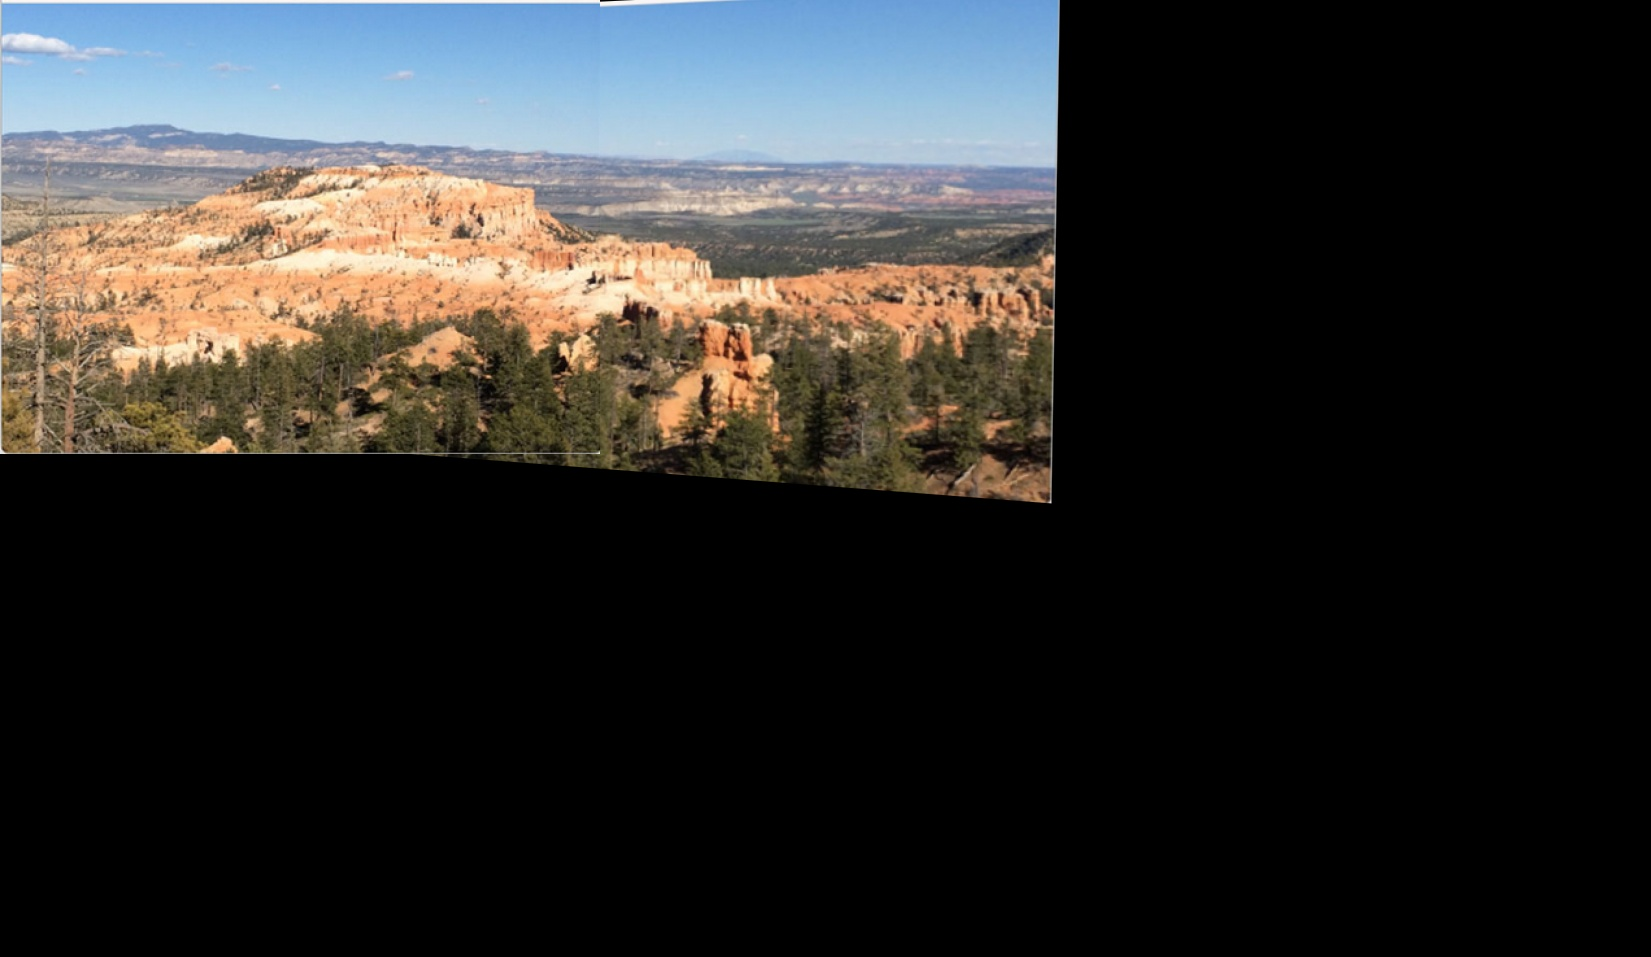

In [2]:
from IPython.display import Image
Image("Output.jpg")